# Dificultades de los contrastes de hipótesis

En las sesiones anteriores hemos tratado los contrastes de hipótesis como un medio para sacar conclusiones sobre las propiedades de una población. Como hemos visto, los contrastes de hipótesis se basan en el cálculo de un valor a partir de las muestras (estadístico de contraste) y cómo de probable es que dicho valor haya sido generado por una distribución teórica conocida bajo una hipótesis nula (p-valor). 

Sin embargo, el uso de los contrastes de hipótesis lleva asociado una serie de decisiones previas subjetivas que debe tomar el investigador:

1. Elegir el contraste/test adecuado.
2. Establecer la hipótesis alternativa.
3. Elegir el valor de la significación $(\alpha)$.

Estas decisiones previas suelen tomarse de manera subjetiva teniendo en cuenta estudios o experiencias anteriores.

Una aproximación diferente al problema de, por ejemplo, querer comparar las medias de dos poblaciones independientes, sería __estimar__ cuánto de diferentes son las medias poblaciones de los grupos con base en sus incertidumbres. 

La estimación de los parámetros poblacionales (e.g., media y dispersión) es mucho más informativa ya que permite también analizar las posibles (co)relaciones entre estos. Los métodos de __inferencia paramétrica__ no sólo permiten estimar los valores de los parámetros poblacionales sino también su incertidumbre. En esta última se incluiría tanto el desconocimiento del modelo que describe a las poblaciones como la incertidumbre propia de los datos. 

Sin embargo, la inferencia paramétrica supone que:
1. Existe por lo menos un __modelo paramétrico__ que describe los datos.
2. La validez de las conclusiones estará condicionada al __modelo paramétrico__ utilizado.

# Inferencia paramétrica: Frecuentista Vs. Bayesiana

El núcleo de la inferencia paramétrica es la verosimilitud, la cuál provee una medida objetiva (i.e. una métrica) de la diferencia entre la predicción del modelo y las observaciones (i.e., los datos).

En la inferencia frecuentista, la verosimilitud es una función de los parámetros dados los datos:
    $$
    \mathcal{f}(\theta|D_n)
    $$
con $\theta$ los parámetros del modelo y $D_n$ el conjunto de datos.

Por otro lado, en la inferencia Bayesiana, la verosimilitud es una distribución de probabilidad de los datos dados los parámetros:
$$
\mathcal{p}(D_n|\theta)
$$ 
con $\theta$ los parámetros del modelo y $D_n$ el conjunto de datos. 

En ambos paradigmas se esta interesado en el conjunto de valores de los parámetros del modelo ($\theta) que producen la mejor descripción los datos. En otras palabras, que hacen a los datos verosímiles ante el modelo. 

Por un lado, en el paradigma frecuentista este conjunto de parámetros se obtiene con diferentes técnicas de optimización aplicadas directamente a la función verosimilitud. En sesiones anteriores hemos visto modelos paramétricos frequentistas, por ejemplo, el modelo de regresión lineal múltiple y las técnicas de mínimos cuadrados (i.e. OLS). 

Por otro lado, en el paradigma Bayesiano lo que se busca es la __distribución de probabilidad__ de los parámetros dados los datos: $\mathcal{p}(\theta|D_n)$. 
Para obtener esta última es necesario aplicar el [Teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes):
$$
\mathcal{p}(\theta|D_n) = \frac{\mathcal{p}(D_n|\theta) p(\theta)}{\int{\mathcal{p}(D_n|\theta) p(\theta)d\theta}}
$$

dónde $p(\theta)$ se conoce como la distribución ***a priori*** de los parámetros, $z=\int{\mathcal{p}(D_n|\theta) p(\theta)d\theta}$ como la verosimilitud marginal o evidencia Bayesiana, y a $\mathcal{p}(\theta|D_n)$ se le llama distribución ***a posteriori*** de los parámetros dados los datos. Esta última se obtiene a través de diferentes técnicas que exploraremos más adelante.

# Modelando nuestras creencias: distribución previa (prior) y verosimilitud (likelihood)

Repasamos los conceptos sobre el Teorema de Bayes en el primer notebook: Introducción a la probabilidad. Vamos a simular una situación en la que queremos estimar el porcentaje de fallos de cierto servicio en una plataforma logística. El servicio puede fallar o no con cierta probabilidad, ¿cuál es __la creencia__ que tengo sobre ese posible fallo? A dicha creencia le asignamos un modelo probabilístico, llamando $\pi$ a la probabilidad de que el servicio falle.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'retina'
#pylab.rcParams['figure.figsize'] = (10, 6)
#plt.style.use('ggplot')

import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns # Para dibujar distribuciones con poco código
sns.set(color_codes=True)

Si no tengo ninguna creencia sobre cuál puede ser la probabilidad de fallo, el modelo que describe la distribución de $\pi$ será la distribución __Uniforme__ en el intervalo $(0,1)$, o lo que es lo mismo, la distribución __Beta__ con parámetros $(1,1)$: $\mathcal{B}eta (1,1)$

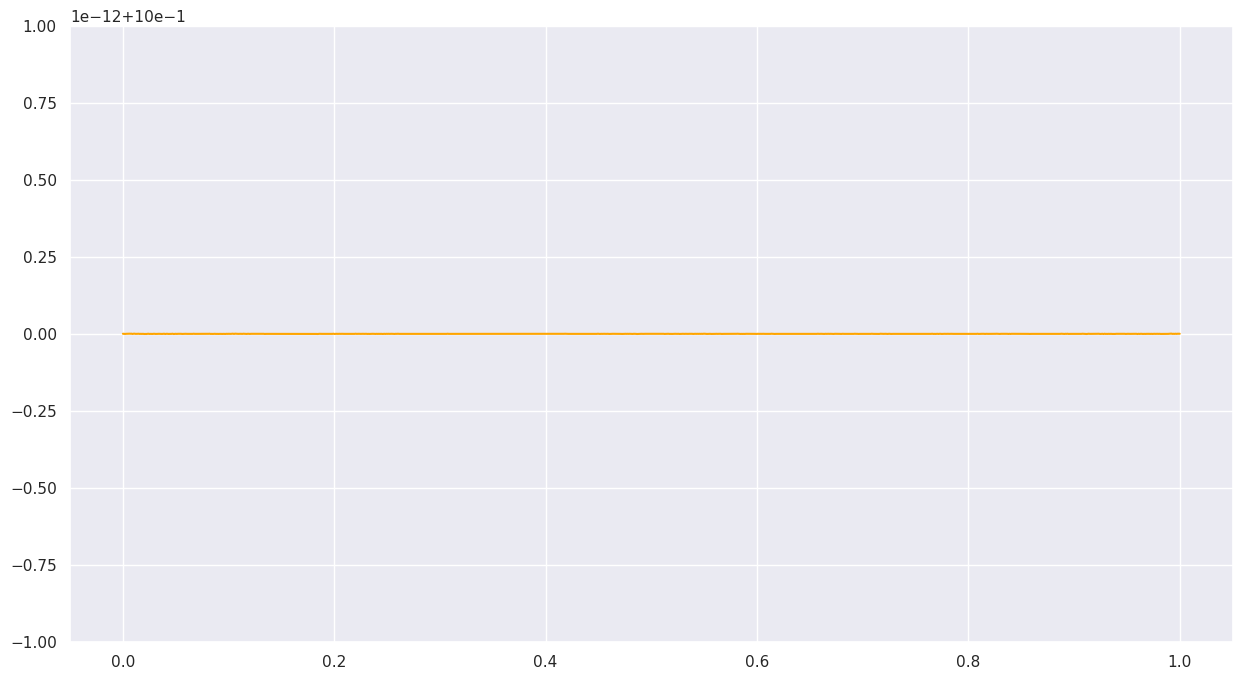

In [2]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
x = np.linspace(0.,1.,1000)
prior = st.beta(1., 1.).pdf(x)
ax.plot(x, prior, color='orange');

Pero esta creencia podría cambiar y modelarla, por ejemplo, con una $\mathcal{B} (3, 10)$, es decir: 

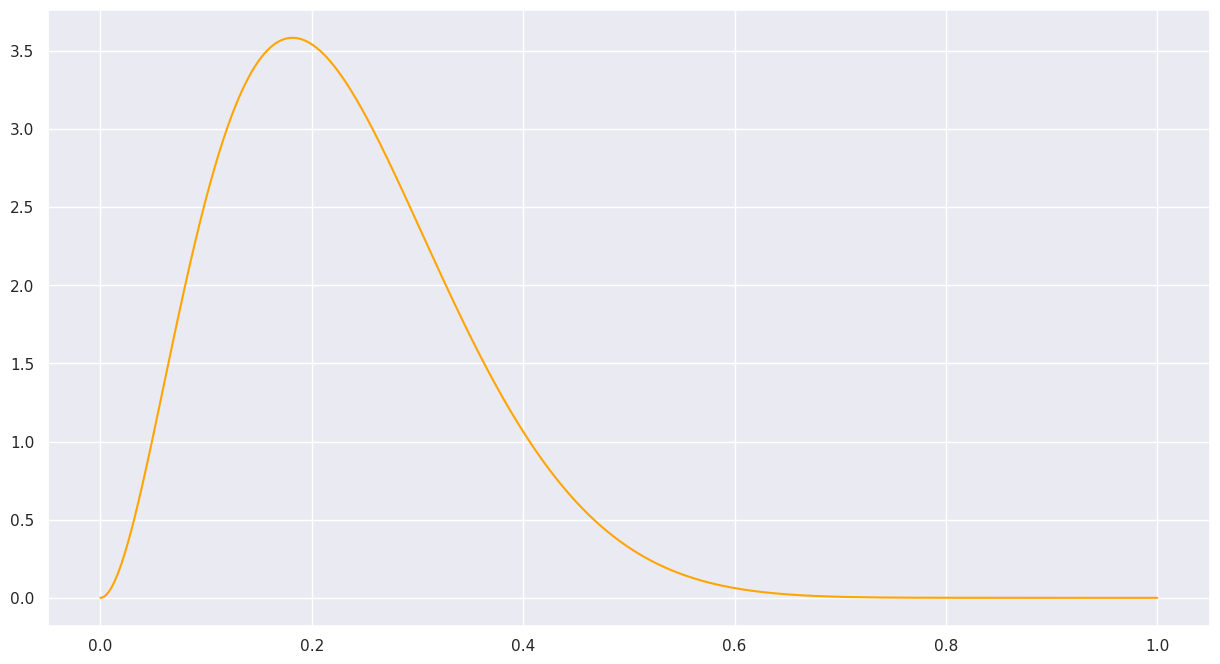

In [3]:
fig, ax = plt.subplots(1,1, figsize=(15,8))
x = np.linspace(0.,1.,1000)
prior = st.beta(3., 10.).pdf(x)
ax.plot(x, prior, color='orange');

Ahora bien, una vez recogido los datos, el número de servicios que falla en esa plataforma logística, de los 10 que hay, se modela a partir de una distribución __Binomial__ con parámetros $\mathcal{B}i(\pi, 10)$. Si se hubieran producido 4 fallos, la función de __verosimilitud__ sería 

$$P(X=4 | \pi) = {10 \choose 4} \cdot \pi^4 \cdot (1-\pi)^{10-4}$$

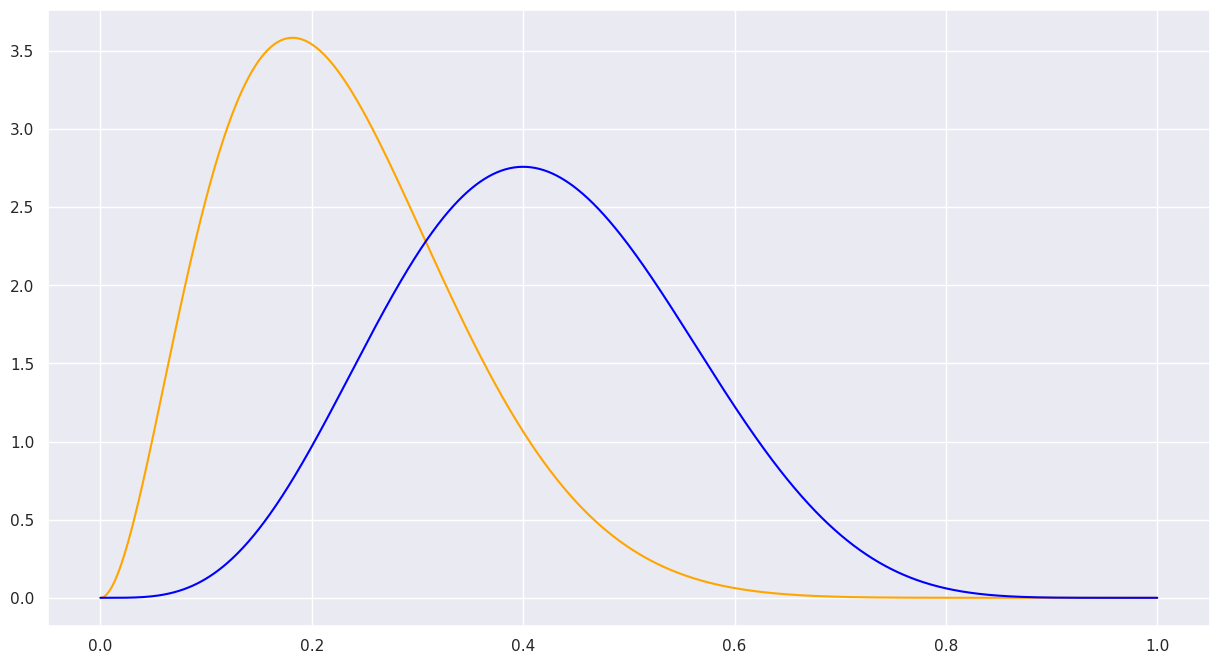

In [4]:
import scipy.special
import scipy.integrate

def likelihood_func(x, n=10, k=4):
    cte = scipy.special.comb(n,k)
    like = st.binom(n, x).pmf(k)
    y = cte * like
    return y

theta = np.linspace(0.,1.,1000)
likelihood = likelihood_func(x = theta, n=10, k=4)
evidence, abserr = scipy.integrate.quad(likelihood_func, a=0, b=1)

fig, ax = plt.subplots(1,1, figsize=(15,8))
ax.plot(x, prior, color='orange');
ax.plot(x, likelihood/evidence, color='blue');

Recordando el teorema de Bayes 

$$P(\pi | D) = \frac{P(D | \pi) \cdot P(\pi)}{P(D)} = \frac{P(D | \pi)}{P(D)} \cdot P(\pi)$$

En nuestro caso

$$P(\pi | D) = \frac{\mathcal{B}i (4; 10, \pi)}{P(D)} \cdot \mathcal{B}eta(3, 10)$$

En este caso, la distribución previa y la verosimilitud __son conjugadas__, es decir, su producto vuelve a ser de la misma familia que la distribución previa:

$$P(\pi | y) = \frac{ \mathcal{B}i(n,\pi)}{P(D)} \cdot \mathcal{B}eta (\alpha, \beta) = \mathcal{B}eta(y+\alpha, n-y+\beta)$$

En nuestro caso:

$$P(\pi | D) = \mathcal{B}eta (4 + 3, 10-4+10) = \mathcal{B}eta (7, 16)$$

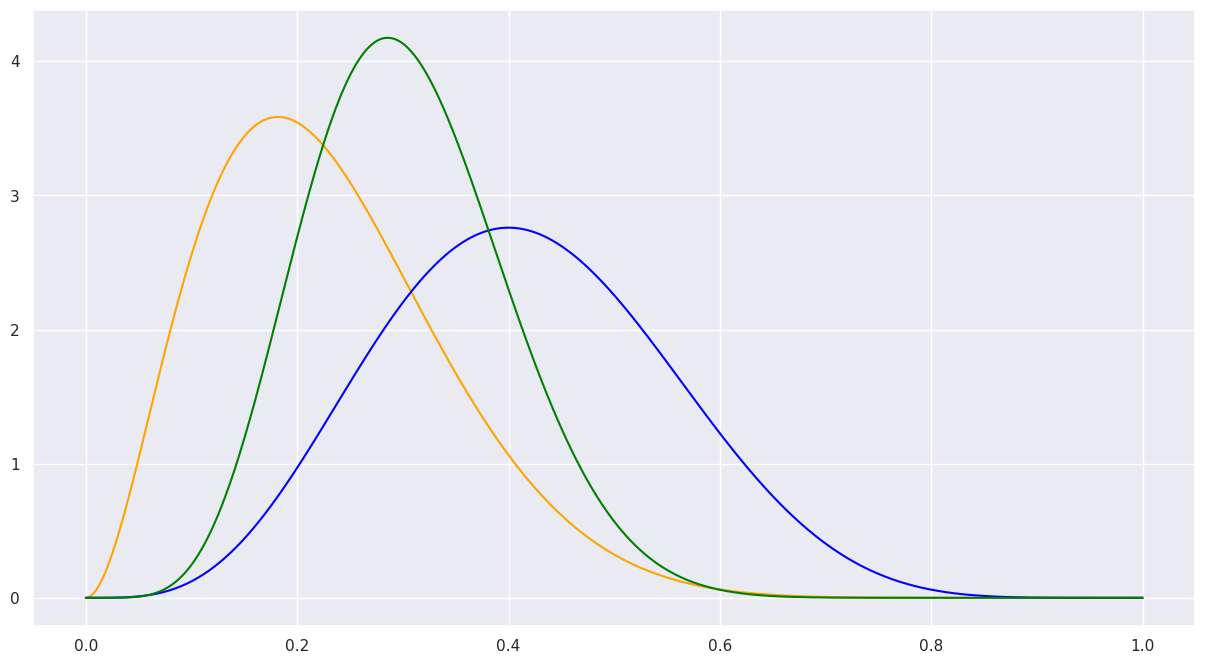

In [5]:
posterior = st.beta(7., 16).pdf(x)

fig, ax = plt.subplots(1,1, figsize=(15,8))
ax.plot(x, prior, color='orange');
ax.plot(x, likelihood/evidence, color='blue');
ax.plot(x, posterior, color='green');

__Ejercicio__ Juega con la distribución previa y con la verosimilitud:

1. ¿Cómo influye en la distribución posterior el hecho de que pongamos una distribución previa NO informativa (uniforme)?

2. Dejando fija una distribución previa, ¿cómo influye en la distribución posterior le hecho de que el tamaño muestral aumente?

## ¿Y si no tuviéramos la posibilidad de utilizar distribuciones conjugadas?

En ese caso tendríamos dos opciones.

1. Utilizar una grid (malla) de puntos para evaluar la distribución posterior.
2. Obtener un conjunto de muestras de la distribución a posterior.

La primera opción es sencilla de implementar pero sufre la [Maldición de la dimensión](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n).

La segunda opción es más difícil de implementar pero tiene innumerables aplicaciones.


# Grid de puntos
Supongamos el siguiente problema (Tomado de [Hogg+2010](https://arxiv.org/abs/1008.4686))

Dado el conjunto de datos `dfhogg` hacer un ajuste lineal tal que $y = ax+b$.

In [6]:
# cut & pasted directly from the fetch_hogg2010test() function
# identical to the original dataset as hardcoded in the Hogg 2010 paper

dfhogg = pd.DataFrame(
    np.array(
        [
            [1, 201, 592, 61, 9, -0.84],
            [2, 244, 401, 25, 4, 0.31],
            [3, 47, 583, 38, 11, 0.64],
            [4, 287, 402, 15, 7, -0.27],
            [5, 203, 495, 21, 5, -0.33],
            [6, 58, 173, 15, 9, 0.67],
            [7, 210, 479, 27, 4, -0.02],
            [8, 202, 504, 14, 4, -0.05],
            [9, 198, 510, 30, 11, -0.84],
            [10, 158, 416, 16, 7, -0.69],
            [11, 165, 393, 14, 5, 0.30],
            [12, 201, 442, 25, 5, -0.46],
            [13, 157, 317, 52, 5, -0.03],
            [14, 131, 311, 16, 6, 0.50],
            [15, 166, 400, 34, 6, 0.73],
            [16, 160, 337, 31, 5, -0.52],
            [17, 186, 423, 42, 9, 0.90],
            [18, 125, 334, 26, 8, 0.40],
            [19, 218, 533, 16, 6, -0.78],
            [20, 146, 344, 22, 5, -0.56],
        ]
    ),
    columns=["id", "x", "y", "sigma_y", "sigma_x", "rho_xy"],
)

dfhogg["id"] = dfhogg["id"].apply(lambda x: "p{}".format(int(x)))
dfhogg.set_index("id", inplace=True)
dfhogg.head()

,x,y,sigma_y,sigma_x,rho_xy
id,,,,,
p1,201.0,592.0,61.0,9.0,-0.84
p2,244.0,401.0,25.0,4.0,0.31
p3,47.0,583.0,38.0,11.0,0.64
p4,287.0,402.0,15.0,7.0,-0.27
p5,203.0,495.0,21.0,5.0,-0.33


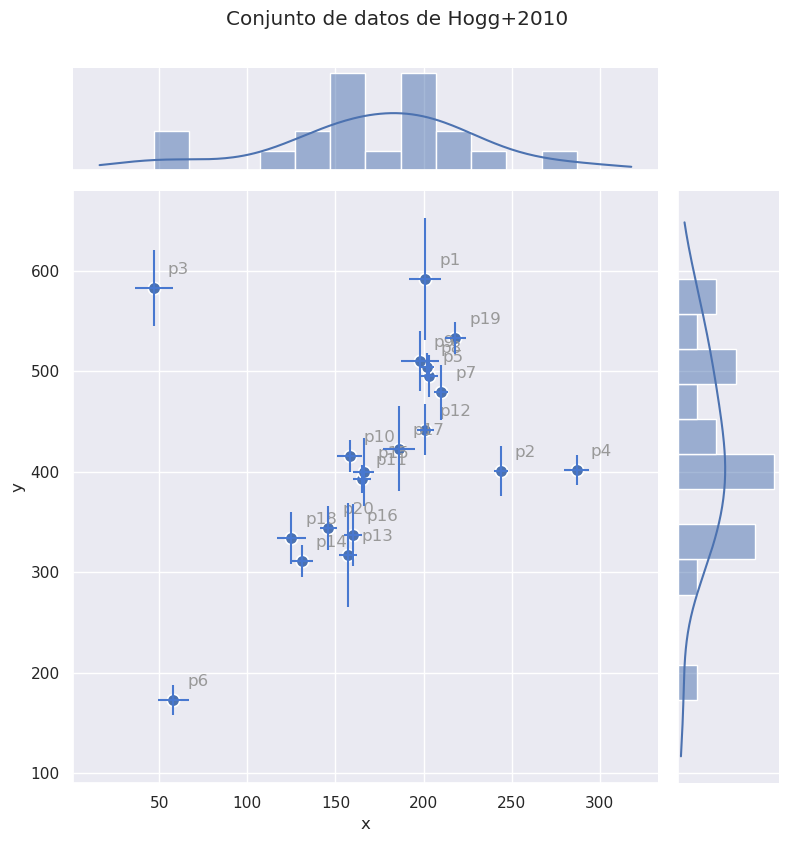

In [7]:
gd = sns.jointplot(
    x="x",
    y="y",
    data=dfhogg,
    kind="scatter",
    height=8,
    marginal_kws={"bins": 12, "kde": True, "kde_kws": {"cut": 1}},
    joint_kws={"edgecolor": "w", "linewidth": 1.2, "s": 80},
)

_ = gd.ax_joint.errorbar(
    "x", "y", "sigma_y", "sigma_x", fmt="none", ecolor="#4878d0", data=dfhogg, zorder=10
)

for idx, r in dfhogg.iterrows():
    _ = gd.ax_joint.annotate(
        text=idx,
        xy=(r["x"], r["y"]),
        xycoords="data",
        xytext=(10, 10),
        textcoords="offset points",
        color="#999999",
        zorder=1,
        )


_ = gd.fig.suptitle("Conjunto de datos de Hogg+2010",y=1.05)

# Problema 1. Inferencia de la pendiente $a$

Hagamos las siguientes suposiciones:
* Descartemos los primeros 4 puntos.
* La ordenada al origen $b$ esta fija a `b=34`.
* Tanto las incertidumbres en $x$ (`sigma_x`)  como las correlaciones (`rho_xy`) son despreciables.
* Los datos fueron generados por una normal con media $y=ax+b$ y desviación estándard `sigma_y`:
$$
y \sim \mathcal{N}(ax+b|\sigma_y)
$$
* Los $n$ datos son iid (independientes e identicamente distribuidos), y por lo tanto la verosimilitud total es:
$$
\mathcal{L}(D_n|a,\sigma_y) = \Pi_{i=1}^{i=n}\mathcal{N}(y_i|ax_i+b,\sigma_{y_i})
$$
* La distribución a priori o prior de $a$ es normal con media cero y desviación estándard de 10.

In [8]:
dfhogg_good = dfhogg.loc[~np.isin(dfhogg.index,["p1","p2","p3","p4"]),["x","y","sigma_y"]].copy()
print(dfhogg_good)

         x      y  sigma_y
id                        
p5   203.0  495.0     21.0
p6    58.0  173.0     15.0
p7   210.0  479.0     27.0
p8   202.0  504.0     14.0
p9   198.0  510.0     30.0
p10  158.0  416.0     16.0
p11  165.0  393.0     14.0
p12  201.0  442.0     25.0
p13  157.0  317.0     52.0
p14  131.0  311.0     16.0
p15  166.0  400.0     34.0
p16  160.0  337.0     31.0
p17  186.0  423.0     42.0
p18  125.0  334.0     26.0
p19  218.0  533.0     16.0
p20  146.0  344.0     22.0


In [9]:
# Definiciones
# st.norm.pdf(x,loc=media,scale=desviacion_estandard)
# st.norm.logpdf(x,loc=media,scale=desviacion_estandard)

def prior(a,loc=0.0,scale=10.0):
    return st.norm(loc=loc,scale=scale).pdf(a)

def likelihood(a,b):
    lklhd = 0.0
    for idx, row in dfhogg_good.iterrows():
        lklhd += st.norm.logpdf(
                x=row["y"],
                loc=a*row["x"] + b,
                scale=row["sigma_y"])
    
    return np.exp(lklhd)

def unormalised_posterior(a,b=34.0):
    return likelihood(a,b)*prior(a)
    

z,z_err = scipy.integrate.quad(lambda x:likelihood(x,b=34.0)*prior(x),-np.inf,np.inf)
print("La evidencia Bayesiana o verosimilitud marginal vale: {0}".format(z))
        
    

La evidencia Bayesiana o verosimilitud marginal vale: 6.570592121471658e-36


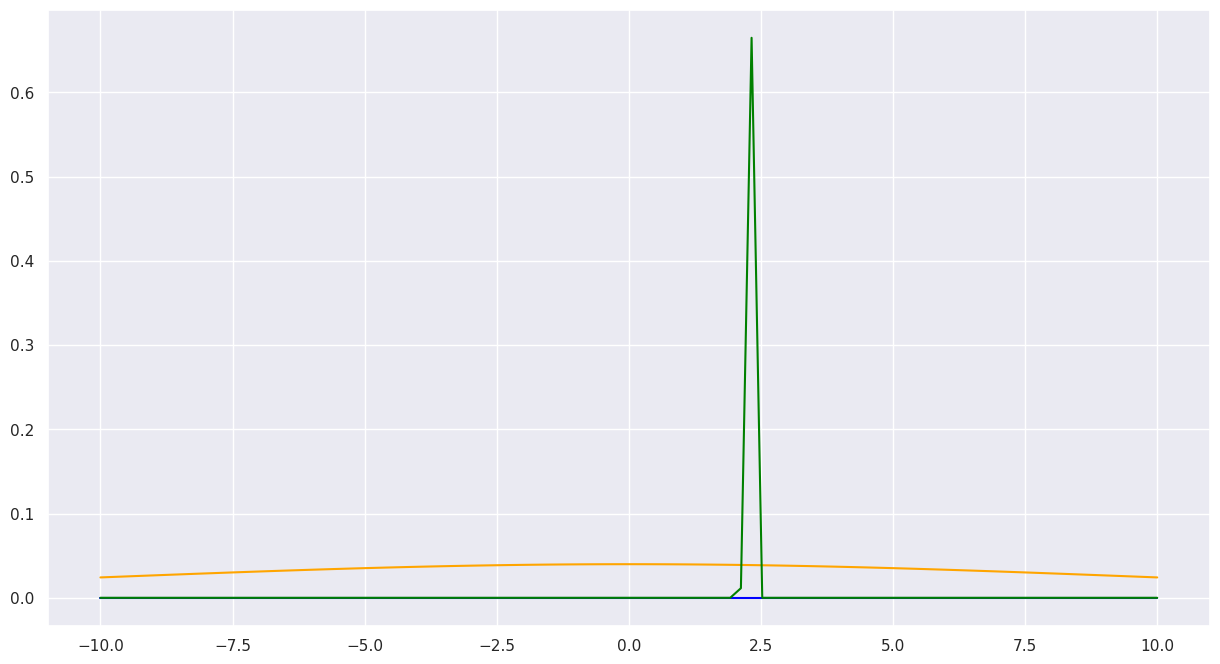

In [10]:
n_points = 100
a = np.linspace(-10,10,num=n_points)
fig, ax = plt.subplots(1,1, figsize=(15,8))
ax.plot(a, prior(a), color='orange')
ax.plot(a, likelihood(a,b=34.0), color='blue')
ax.plot(a, unormalised_posterior(a,b=34.0)/z, color='green')
plt.show()

In [11]:
lklhd = likelihood(a,b=34.0)
pstrr = unormalised_posterior(a,b=34.0)/z
#print(lklhd)
#print(pstrr)
mlk_slope = a[np.argmax(lklhd)]
map_slope = a[np.argmax(pstrr)]
print("Maximo de la verosimilitud en: {0:2.3f}".format(mlk_slope))
print("Maximo a posteriori en: {0:2.3f}".format(map_slope))
#print("Fracción de puntos para los que la verosimilitud no es cero: ",np.count_nonzero(pstrr)/n_points)

Maximo de la verosimilitud en: 2.323
Maximo a posteriori en: 2.323


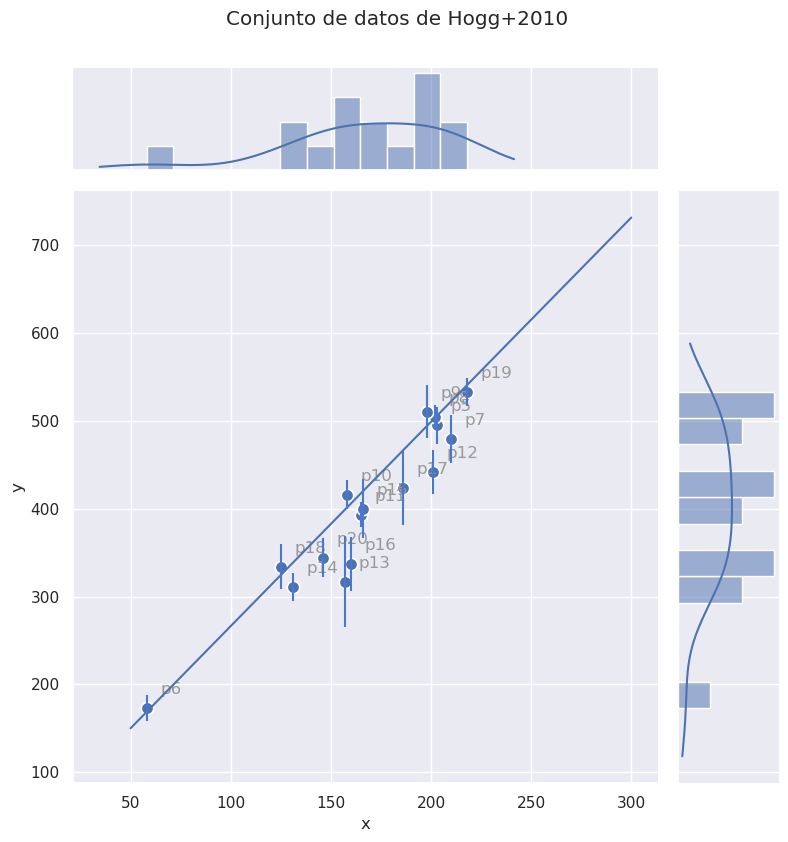

In [12]:
gd = sns.jointplot(
    x="x",
    y="y",
    data=dfhogg_good,
    kind="scatter",
    height=8,
    marginal_kws={"bins": 12, "kde": True, "kde_kws": {"cut": 1}},
    joint_kws={"edgecolor": "w", "linewidth": 1.2, "s": 80},
)

_ = gd.ax_joint.errorbar(
    "x", "y", "sigma_y", fmt="none", ecolor="#4878d0", data=dfhogg_good, zorder=10
)

for idx, r in dfhogg_good.iterrows():
    _ = gd.ax_joint.annotate(
        text=idx,
        xy=(r["x"], r["y"]),
        xycoords="data",
        xytext=(10, 10),
        textcoords="offset points",
        color="#999999",
        zorder=1,
        )


_ = gd.fig.suptitle("Conjunto de datos de Hogg+2010",y=1.05)

x = np.linspace(50,300,num=100)
_ = gd.ax_joint.plot(x,map_slope*x + 34.0)

Ejercicios:
1. ¿Para encontrar el valor óptimo de la pendiente (máximo a posteriori), es necesario calcular (utilizar) el factor z (i.e., la evidencia)? ¿Por qué?
2. En el ejemplo, los valores máximo verosímil y máximo a posteriori coinciden. ¿Cómo tiene que ser el prior para que estos valores sean distintos? Juega con los parámetros del prior.
3. ¿Cómo calcularías la incertidumbre de la pendiente? ¿Crees que dependería del numero de puntos en la grid?
4. ¿Qué porcentaje de puntos de la grid son cero? Utiliza la función `np.count_nonzero`

# Problema 2. Inferencia de la pendiente $a$ y la ordenada al origen $b$

Hagamos las siguientes suposiciones:
* Descartemos los primeros 4 puntos.
* Tanto las incertidumbres en $x$ (`sigma_x`) como las correlaciones (`rho_xy`) son despreciables.
* Los datos fueron generados por una normal con media $y=ax+b$ y desviación estándard `sigma_y`:
$$
y \sim \mathcal{N}(ax+b|\sigma_y)
$$
* Los $n$ datos son iid (independientes e idénticamente distribuidos), y por lo tanto la verosimilitud total es:
$$
\mathcal{L}(D_n|a,\sigma_y) = \Pi_{i=1}^{i=n}\mathcal{N}(y_i|ax_i+b,\sigma_{y_i})
$$
* La distribución a priori o prior es independiente en $a$ y $b$.
* La distribución a priori o prior de $a$ es normal con media cero y desviación estándard de 10.
* La distribución a priori o prior de $b$ es normal con media cero y desviación estándard de 100.

In [13]:
def prior_a(a,loc=0.0,scale=10.0):
    return st.norm(loc=loc,scale=scale).pdf(a)

def prior_b(b,loc=0.0,scale=100.0):
    return st.norm(loc=loc,scale=scale).pdf(b)

def prior(a,b,loc_a=0.0,loc_b=0.0,scl_a=10.0,scl_b=100.0):
    return prior_a(a,loc=loc_a,scale=scl_a)*prior_b(b,loc=loc_b,scale=scl_b)

def unormalised_posterior(a,b):
    return likelihood(a,b)*prior(a,b)
    
#z,z_err = scipy.integrate.quad(lambda x:likelihood(x,b=34.0)*prior(x),-np.inf,np.inf)
#print("La evidencia Bayesiana o verosimilitud marginal vale: {0}".format(z))

Creamos una grid 2D con `n_points x n_points` donde evaluamos las distribuciones prior y posterior

In [14]:
n_points = 100
a = np.linspace(-10, 10, n_points)
b = np.linspace(-100, 100, n_points)
aa, bb = np.meshgrid(a, b, sparse=False)
aas, bbs = np.meshgrid(a, b, sparse=True)
prrs = prior(aas,bbs)
pstrs = unormalised_posterior(aas,bbs)
%timeit pstrs = unormalised_posterior(aas,bbs)
print(aas.shape, bbs.shape, prrs.shape,pstrs.shape)
#print("Fracción de puntos para los que la verosimilitud no es cero: ",np.count_nonzero(pstrr)/n_points**2)

4.16 ms ± 20.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
(1, 100) (100, 1) (100, 100) (100, 100)


Hacemos una gráfica de contornos que nos muestre tanto la distribución a priori como la posterior.
Pintamos también la grid de puntos.

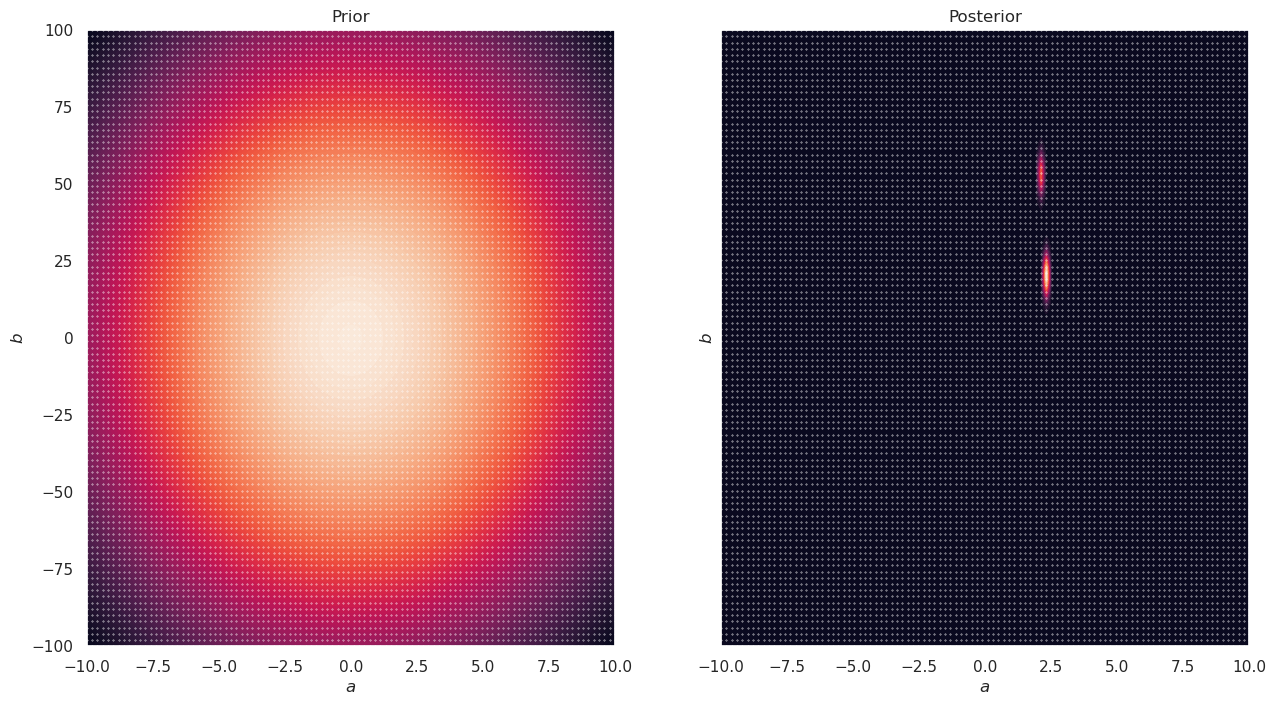

In [15]:
fig, (axl,axr) = plt.subplots(nrows=1,ncols=2, sharey=True,figsize=(15,8))
axl.contourf(a, b, prrs,levels=100)
axl.scatter(aa,bb,s=0.1,c="white")
axl.set_xlabel("$a$")
axl.set_ylabel("$b$")
axl.set_title("Prior")
axr.contourf(a, b, pstrs,levels=20)
axr.scatter(aa,bb,s=0.1,c="white")
axr.set_xlabel("$a$")
axr.set_ylabel("$b$")
axr.set_title("Posterior")
plt.show()

Hagamos un zoom para observar la zona del máximo-a-posteriori.

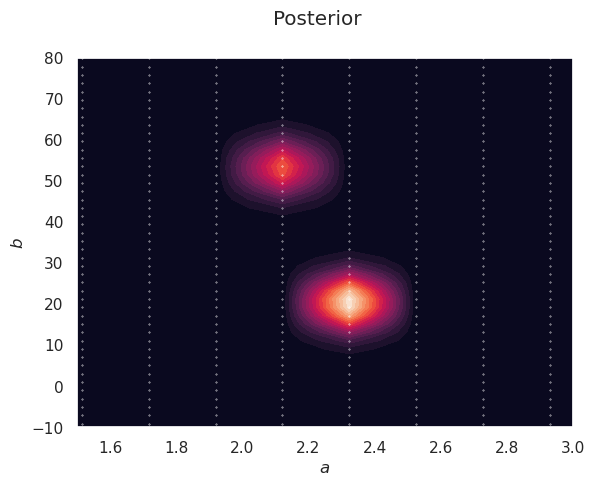

Máximo a posteriori de a: 2.323
Máximo a posteriori de b: 21.212


In [16]:
plt.contourf(a, b, pstrs,levels=20,zorder=1)
plt.scatter(aa,bb,s=0.1,color="white",zorder=2)
plt.xlabel("$a$")
plt.ylabel("$b$")
plt.suptitle("Posterior")
plt.xlim(1.5,3)
plt.ylim(-10,80)
plt.show()

idx_map = np.unravel_index(np.argmax(pstrs),shape=pstrs.shape)
map_a = a[idx_map[1]]
map_b = b[idx_map[0]]
print("Máximo a posteriori de a: {0:2.3f}".format(map_a))
print("Máximo a posteriori de b: {0:2.3f}".format(map_b))

In [17]:
# Cómo mostramos la incertidumbre.

map_pstrs = np.max(pstrs)
idx_unc = np.where(pstrs > 0.5*map_pstrs)
a_unc = a[idx_unc[1]]
b_unc = b[idx_unc[0]]

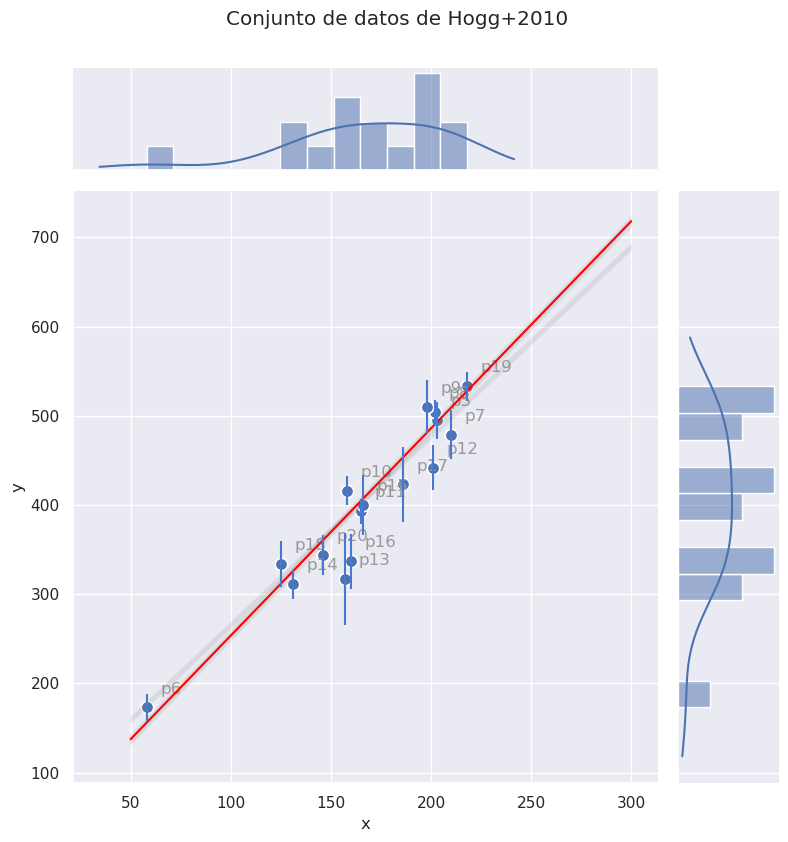

In [18]:
gd = sns.jointplot(
    x="x",
    y="y",
    data=dfhogg_good,
    kind="scatter",
    height=8,
    marginal_kws={"bins": 12, "kde": True, "kde_kws": {"cut": 1}},
    joint_kws={"edgecolor": "w", "linewidth": 1.2, "s": 80},
)

_ = gd.ax_joint.errorbar(
    "x", "y", "sigma_y", fmt="none", ecolor="#4878d0", data=dfhogg_good, zorder=10
)

for idx, r in dfhogg_good.iterrows():
    _ = gd.ax_joint.annotate(
        text=idx,
        xy=(r["x"], r["y"]),
        xycoords="data",
        xytext=(10, 10),
        textcoords="offset points",
        color="#999999",
        zorder=1,
        )


_ = gd.fig.suptitle("Conjunto de datos de Hogg+2010",y=1.05)

# Pintamos el MAP en rojo y la incertidumbre en gris
x = np.linspace(50,300,num=100)
for a,b in zip(a_unc,b_unc):
    _ = gd.ax_joint.plot(x,a*x + b,color="gray",alpha=0.1)
_ = gd.ax_joint.plot(x,map_a*x + map_b,color="red")

Ejercicios.
1. Por qué parece haber dos máximos en la distribución a posteriori? ¿Por qué coinciden los máximos con los puntos de la grid?
2. Incrementa al doble y al triple el numero de puntos en la grid. ¿Qué pasa?
3. ¿Qué porcentaje de puntos en la grid son cero? Cómo compara con el resultado del caso unidimensional?
4. Suponiendo que los puntos en la grid se disponen de manera uniforme y que la evaluación de la verosimilitud cuesta lo mismo para cada punto en la grid, ¿Qué porcentaje del tiempo de computo se pierde en evaluar ceros? ¿Que esperarías para un modelo con 3 parámetros?
5. Supongamos que queremos determinar la pendiente con una incertidumbre absoluta de $\pm$0.1 utilizando una grid uniforme. ¿Cuántos puntos necesitamos en el parámetro $a$? Deja fijo el intervalo [-10,10]